In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import os
import pandas as pd
import cv2 
import numpy as np
pd.set_option('display.max_columns', None)

In [5]:
root_drive = '/content/drive/My Drive/Interviews/'

# IMAGE SETTINGS
IMG_SIZE = 28

train_csv = root_drive + 'AI_Basic_Test/train.csv'
test_csv  = root_drive + 'AI_Basic_Test/test_set.csv'
vald_csv = root_drive + 'AI_Basic_Test/val.csv'

train_df = pd.read_csv(train_csv, delimiter=',')
test_df = pd.read_csv(test_csv, delimiter=',')
valdt_df = pd.read_csv(vald_csv, delimiter=',')
train_df.shape, valdt_df.shape

((1440, 2), (480, 2))

In [ ]:
train_df.head()

,Image_Path,Class
0,Training/Motorbike/2015_05830.jpg,Motorbike
1,Training/People/2015_06279.jpg,People
2,Training/Boat/2015_00807.jpg,Boat
3,Training/Cat/2015_03206.jpg,Cat
4,Training/Boat/2015_00677.jpg,Boat


In [ ]:
train_df.isnull().any()

Image_Path    False
Class         False
dtype: bool

In [ ]:
train_img_path = train_df.Image_Path.values.tolist()
train_img_path[:5]

['Training/Motorbike/2015_05830.jpg',
 'Training/People/2015_06279.jpg',
 'Training/Boat/2015_00807.jpg',
 'Training/Cat/2015_03206.jpg',
 'Training/Boat/2015_00677.jpg']

In [ ]:
vald_img_path = valdt_df.Image_Path.values.tolist()
vald_img_path[:5]

['Validation/Table/2015_07109.jpg',
 'Validation/Cat/2015_03292.jpg',
 'Validation/People/2015_06549.jpg',
 'Validation/Bicycle/2015_00310.jpg',
 'Validation/Table/2015_07105.jpg']

In [8]:
def imgage_to_arr_dataset(img_l=[]):
  '''
    To resize and convert the images to array 
  '''
  arr_data = []
  for img in img_l:
    path = root_drive + 'Dataset/' + img 
    ld_img_obj = cv2.resize(cv2.imread(path),(IMG_SIZE,IMG_SIZE))
    image=np.array(ld_img_obj)
    image = image.astype('float32')
    image /= 255 # normalize the values to range 0 to 1 for fast convergence
    arr_data.append(image)
  return arr_data

In [ ]:
train_data_arr = imgage_to_arr_dataset(train_img_path)

In [ ]:
train_data_arr[0].shape

(28, 28, 3)

In [ ]:
# Processing the Test Data
vald_data_arr = imgage_to_arr_dataset(vald_img_path)

In [ ]:
vald_data_arr[0].shape

(28, 28, 3)

In [ ]:
""" 
  Now we should use the label encoding for target and then we convert that into One-hot enoding representation
"""
def convert_label_numeric(x):
  return {
      'Bicycle': 0,
      'Table': 1,
      'Motorbike': 2,
      'Cat': 3,
      'Boat': 4,
      'People': 5
  }.get(x)
  

train_df['Target'] = train_df.Class.apply(convert_label_numeric)
valdt_df['Target'] = valdt_df.Class.apply(convert_label_numeric)

In [ ]:
valdt_df.head()

,Image_Path,Class,Target
0,Validation/Table/2015_07109.jpg,Table,1
1,Validation/Cat/2015_03292.jpg,Cat,3
2,Validation/People/2015_06549.jpg,People,5
3,Validation/Bicycle/2015_00310.jpg,Bicycle,0
4,Validation/Table/2015_07105.jpg,Table,1


In [ ]:
# Now build the CNN
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, Activation

model = Sequential()
# First Convalutional Layer
model.add(Conv2D(8, kernel_size=3, kernel_initializer='glorot_normal', input_shape=(IMG_SIZE,IMG_SIZE,3)))
model.add(Activation('relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.2))

# # Second Convalutional Layer
model.add(Conv2D(32, kernel_size=9, kernel_initializer='glorot_normal'))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(6))
model.add(Activation('softmax'))

In [ ]:
#compile model using accuracy to measure model performance
# model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# from tensorflow.keras.optimizers import SGD
# opt = SGD(learning_rate=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
import numpy as np

#Training the model
X_train = np.array([i for i in train_data_arr])
Y_train = np.array([i for i in train_df.Target.values.tolist()])
x_test = np.array([i for i in vald_data_arr])
y_test = np.array([i for i in valdt_df.Target.values.tolist()])

from sklearn import preprocessing

# Define the One-hot Encoder
ohe = preprocessing.OneHotEncoder()

# Reshape data
Y_train = Y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

# Fit and transform training data
Y_train = ohe.fit_transform(Y_train).toarray()

# Fit and transform testing data
y_test = ohe.fit_transform(y_test).toarray()

model_history = model.fit(x=X_train, y=Y_train, epochs=100, shuffle=True)

Epoch 1/100
45/45 [==============================] - 2s 24ms/step - loss: 1.7877 - accuracy: 0.1840
Epoch 2/100
45/45 [==============================] - 1s 24ms/step - loss: 1.7394 - accuracy: 0.2618
Epoch 3/100
45/45 [==============================] - 1s 23ms/step - loss: 1.6532 - accuracy: 0.3285
Epoch 4/100
45/45 [==============================] - 1s 24ms/step - loss: 1.5699 - accuracy: 0.3840
Epoch 5/100
45/45 [==============================] - 1s 23ms/step - loss: 1.5219 - accuracy: 0.4000
Epoch 6/100
45/45 [==============================] - 1s 23ms/step - loss: 1.4734 - accuracy: 0.4229
Epoch 7/100
45/45 [==============================] - 1s 24ms/step - loss: 1.4391 - accuracy: 0.4396
Epoch 8/100
45/45 [==============================] - 1s 23ms/step - loss: 1.4105 - accuracy: 0.4618
Epoch 9/100
45/45 [==============================] - 1s 23ms/step - loss: 1.3770 - accuracy: 0.4785
Epoch 10/100
45/45 [==============================] - 1s 24ms/step - loss: 1.3375 - accuracy: 0.4847

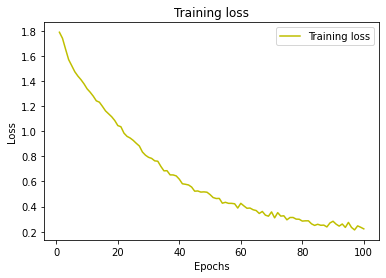

In [ ]:
import matplotlib.pyplot as plt

loss = model_history.history['loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.title('Training loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

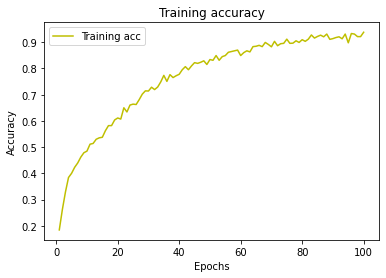

In [ ]:
acc = model_history.history['accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.title('Training accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [7]:
def inverse_target(x):
  return {
      0: 'Bicycle',
      1: 'Table',
      2: 'Motorbike',
      3: 'Cat',
      4: 'Boat',
      5: 'People'
  }.get(x)

In [ ]:
prediction = model.predict(x_test)
elem_inx = np.argmax(prediction[1])
inverse_target(elem_inx)

'Cat'

In [ ]:
y_test[1] # Predited correctly cat

array([0., 0., 0., 1., 0., 0.])

In [ ]:
model.save(root_drive+ 'model.hd5')

INFO:tensorflow:Assets written to: /content/drive/My Drive/Interviews/model.hd5/assets


In [6]:
from keras.models import load_model
model = load_model(root_drive+ 'model.hd5')

In [9]:
# Testing with Test data

def find_category(x):
  arr = imgage_to_arr_dataset([x])
  test_image = np.array([i for i in arr])
  result = model.predict(test_image)
  result = np.rint(result)
  elem_inxs = np.argmax(result)
  return inverse_target(elem_inxs)

# single image test
image_url = 'Testing/2015_00466.jpg' # Bicycle image

find_category(image_url)


'Bicycle'

In [11]:
test_df['Class'] = test_df.Image_Path.apply(find_category)

In [12]:
test_df.head()

,Image_Path,Class
0,Testing/2015_00417.jpg,Bicycle
1,Testing/2015_07261.jpg,Motorbike
2,Testing/2015_01083.jpg,Boat
3,Testing/2015_06722.jpg,Table
4,Testing/2015_01124.jpg,Boat


In [14]:
test_df.to_csv(root_drive + 'AI_Basic_Test/test.csv')